# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Seek.com](https://www.seek.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like seek.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.
 
## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

 

## Suggestions for Getting Started

1. Collect data from [seek.com](www.seek.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
 
---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 4 point scale (0, 1, 2 or 3). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

 Score | Expectations
 ----- | ------------
 **0** | _Did not complete. Try again._
 **1** | _Does not meet expectations. Try again_
 **2** | _Meets expectations._
 **3** | _Surpasses expectations. Brilliant!_
 
 # Project 4 feedback
| Requirement | Rubric   |
|------|------|
|   Scrape and prepare your own data  | |
|   Create and compare at least two models, one a decision tree or ensemble and the other a classifier or regression for Section 1: Job Salary Trends and Section 2: Job Category Factors (so at least 4 models in total)  | |
|   Polished Jupyter notebook with your analysis annotated for a peer audience of data scientists  | |
|  Executive summary at the beginning of your notebook for written for your superiors to use to make business decisions. Make sure that it includes the ‘So what…’ regarding your analysis, risks and limitations. ||
|   
__Qualitative feedback:__


In [256]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import plotly.express as px

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [257]:
# # dsi-unit-4.18-nlp-intro_to_nlp-lesson

# from nltk.corpus import stopwords
# stop = stopwords.words('english')
# sentence = "this is a foo bar sentence"
# print([i for i in sentence.split() if i not in stop])
# # ['foo', 'bar', 'sentence']

# # Attempted to load corpora/stopwords

In [258]:
# Determining proportions for train_test_split


phi_0 = (1 + np.sqrt(5))/2 # Golden Ratio
phi_1 = 1/phi_0
phi_2 = phi_1/phi_0

display(
    phi_0,
    phi_1,
    phi_2
    )

1.618033988749895

0.6180339887498948

0.3819660112501051

In [259]:
def cvec_df(series):
    
    '''
    Applies CountVectorizer() onto an input series/column and returns a pandas dataframe    
    
    Written by Krisdan
    '''
    
    from sklearn.feature_extraction.text import CountVectorizer
    cvec = CountVectorizer(stop_words='english')
    
    cvec.fit(series)
    
    import pandas as pd
    
    return pd.DataFrame(cvec.transform(series).todense(),
                       columns=cvec.get_feature_names_out())

In [260]:
data = pd.read_csv("kk_proj4_json.csv")
data = data.drop(columns = 'Unnamed: 0')
data

,Job Title,Company,multiple_details,Description
0,Data Scientist,Fundo Loans,"['Sydney', 'CBD, Inner West & Eastern Suburbs'...",We are scaling up! An exciting opportunity exi...
1,Data Analyst,AIA Australia Limited,"['Melbourne', 'CBD & Inner Suburbs', 'Banking ...",The focus of this role is to provide support t...
2,Junior Business Intelligence Analyst,Hays Talent Solutions,"['Sydney', 'CBD, Inner West & Eastern Suburbs'...","Your new companyAt Hays, we are on a journey t..."
3,Data Analyst,Atos Australia,"['Sydney', 'CBD, Inner West & Eastern Suburbs'...",About Atos:Atos is a global leader in digital ...
4,Data Analyst,Infrastructure Partnerships Australia,"['Sydney', 'CBD, Inner West & Eastern Suburbs'...",About Infrastructure Partnerships AustraliaInf...
...,...,...,...,...
1074,Data Analyst,Aurec,"['ACT', 'Information & Communication Technolog...",We are looking to engage a skilled and enthusi...
1075,Senior Data Analyst - NSW Government,Talenza,"['Sydney', 'CBD, Inner West & Eastern Suburbs'...",Senior Data Analyst - NSW GovernmentLocation: ...
1076,Principal Engineer (Knowledge Graph),SEEK Limited,"['Melbourne', 'CBD & Inner Suburbs', 'Informat...",Company DescriptionAbout SEEKSEEK’s portfolio ...
1077,Data Management Analyst,Humanised Group,"['Brisbane', 'CBD & Inner Suburbs', 'Informati...",About the role:In this role you will be requir...


In [261]:
data.head()

,Job Title,Company,multiple_details,Description
0,Data Scientist,Fundo Loans,"['Sydney', 'CBD, Inner West & Eastern Suburbs'...",We are scaling up! An exciting opportunity exi...
1,Data Analyst,AIA Australia Limited,"['Melbourne', 'CBD & Inner Suburbs', 'Banking ...",The focus of this role is to provide support t...
2,Junior Business Intelligence Analyst,Hays Talent Solutions,"['Sydney', 'CBD, Inner West & Eastern Suburbs'...","Your new companyAt Hays, we are on a journey t..."
3,Data Analyst,Atos Australia,"['Sydney', 'CBD, Inner West & Eastern Suburbs'...",About Atos:Atos is a global leader in digital ...
4,Data Analyst,Infrastructure Partnerships Australia,"['Sydney', 'CBD, Inner West & Eastern Suburbs'...",About Infrastructure Partnerships AustraliaInf...


In [262]:
# Help from Geoff

# string form of list
data.multiple_details.head().values

array(["['Sydney', 'CBD, Inner West & Eastern Suburbs', 'Information & Communication Technology', 'Engineering - Software', '$110,000 - $149,999', 'Full time']",
       "['Melbourne', 'CBD & Inner Suburbs', 'Banking & Financial Services', 'Analysis & Reporting', 'Full time']",
       "['Sydney', 'CBD, Inner West & Eastern Suburbs', 'Information & Communication Technology', 'Business/Systems Analysts', 'Full time']",
       "['Sydney', 'CBD, Inner West & Eastern Suburbs', 'Information & Communication Technology', 'Business/Systems Analysts', 'Full time']",
       "['Sydney', 'CBD, Inner West & Eastern Suburbs', 'Consulting & Strategy', 'Analysts', 'Full time']"],
      dtype=object)

In [263]:
# Help from Geoff

# parse string into list using ast
import ast
data['multiple_details_lst'] = data.multiple_details.apply(lambda x: ast.literal_eval(x))

In [264]:
# Help from Geoff

# check length of lists
data['items'] = data.multiple_details_lst.apply(lambda x:len(x))
data['items'].value_counts()

5    653
6    277
4    149
Name: items, dtype: int64

In [265]:
# Help from Geoff

# hypothesis - lists of different lengths have different features.
# features are based on their index in the list
# features share the same index in the list. 

# region, industry, role_type, offer_type
data.loc[(data['items']==4),'multiple_details_lst'].sample(10).values

array([list(['Adelaide', 'Accounting', 'Financial Managers & Controllers', 'Full time']),
       list(['Sydney', 'Insurance & Superannuation', 'Other', 'Contract/Temp']),
       list(['Newcastle, Maitland & Hunter', 'Information & Communication Technology', 'Business/Systems Analysts', 'Full time']),
       list(['ACT', 'Government & Defence', 'Government - Federal', 'Contract/Temp']),
       list(['Melbourne', 'Human Resources & Recruitment', 'Consulting & Generalist HR', 'Full time']),
       list(['Melbourne', 'Information & Communication Technology', 'Business/Systems Analysts', 'Full time']),
       list(['Melbourne', 'Information & Communication Technology', 'Engineering - Software', 'Full time']),
       list(['Adelaide', 'Information & Communication Technology', 'Business/Systems Analysts', 'Full time']),
       list(['Sydney', 'Information & Communication Technology', 'Business/Systems Analysts', 'Part time']),
       list(['Melbourne', 'Information & Communication Technology'

In [266]:
# Help from Geoff


# region, sub-region, industry, role_type, offer_type
data.loc[(data['items']==5),'multiple_details_lst'].sample(10).values

array([list(['Sydney', 'CBD, Inner West & Eastern Suburbs', 'Information & Communication Technology', 'Database Development & Administration', 'Full time']),
       list(['Sydney', 'CBD, Inner West & Eastern Suburbs', 'Information & Communication Technology', 'Business/Systems Analysts', 'Contract/Temp']),
       list(['Melbourne', 'Northern Suburbs', 'Accounting', 'Analysis & Reporting', 'Full time']),
       list(['Sydney', 'CBD, Inner West & Eastern Suburbs', 'Banking & Financial Services', 'Analysis & Reporting', 'Full time']),
       list(['ACT', 'Information & Communication Technology', 'Developers/Programmers', 'Long Term extension opportunity', 'Contract/Temp']),
       list(['Melbourne', 'Information & Communication Technology', 'Business/Systems Analysts', 'Daily Rate Available ', 'Contract/Temp']),
       list(['Sydney', 'CBD, Inner West & Eastern Suburbs', 'Information & Communication Technology', 'Business/Systems Analysts', 'Full time']),
       list(['Melbourne', 'CBD & 

In [267]:
# Help from Geoff

# region, sub-region, industry, role_type, renumeration, offer_type
data.loc[(data['items']==6),'multiple_details_lst'].sample(10).values

array([list(['Melbourne', 'CBD & Inner Suburbs', 'Information & Communication Technology', 'Business/Systems Analysts', '$53.63 per hour', 'Contract/Temp']),
       list(['Sydney', 'CBD, Inner West & Eastern Suburbs', 'Science & Technology', 'Mathematics, Statistics & Information Sciences', '$75,200 to $84,468 plus 15.4% super ', 'Full time']),
       list(['Sydney', 'CBD, Inner West & Eastern Suburbs', 'Information & Communication Technology', 'Business/Systems Analysts', 'Permanent role. Flexibility with remote working.', 'Full time']),
       list(['Melbourne', 'CBD & Inner Suburbs', 'Government & Defence', 'Government - Federal', '$75,200 to $84,468 plus 15.4% super ', 'Full time']),
       list(['Sydney', 'North Shore & Northern Beaches', 'Information & Communication Technology', 'Business/Systems Analysts', '$110000.00 - $120k p.a.', 'Full time']),
       list(['Sydney', 'Parramatta & Western Suburbs', 'Information & Communication Technology', 'Consultants', '$800 + Super per day

In [268]:
# Help from Geoff


# example parser function
def list_to_dict(row):
    d = dict()
    if row['items'] ==4:
        # region, industry, role_type, offer_type
        d['region'] = row['multiple_details_lst'][0]
        d['industry'] = row['multiple_details_lst'][1]
        d['role_type'] = row['multiple_details_lst'][2]
        d['offer_type'] = row['multiple_details_lst'][3]
    if row['items'] ==5:
        # region, sub_region, industry, role_type, offer_type
        d['region'] = row['multiple_details_lst'][0]
        d['sub_region'] = row['multiple_details_lst'][1]
        d['industry'] = row['multiple_details_lst'][2]
        d['role_type'] = row['multiple_details_lst'][3]
        d['offer_type'] = row['multiple_details_lst'][4]
    if row['items'] ==6:
        # region, sub-region, industry, role_type, renumeration, offer_type
        d['region'] = row['multiple_details_lst'][0]
        d['sub_region'] = row['multiple_details_lst'][1]
        d['industry'] = row['multiple_details_lst'][2]
        d['role_type'] = row['multiple_details_lst'][3]
        d['renumeration'] = row['multiple_details_lst'][4] 
        d['offer_type'] = row['multiple_details_lst'][5]        
    return d

data['multiple_items_dict'] = data.apply(list_to_dict,axis=1)
data['multiple_items_dict'].head().values

array([{'region': 'Sydney', 'sub_region': 'CBD, Inner West & Eastern Suburbs', 'industry': 'Information & Communication Technology', 'role_type': 'Engineering - Software', 'renumeration': '$110,000 - $149,999', 'offer_type': 'Full time'},
       {'region': 'Melbourne', 'sub_region': 'CBD & Inner Suburbs', 'industry': 'Banking & Financial Services', 'role_type': 'Analysis & Reporting', 'offer_type': 'Full time'},
       {'region': 'Sydney', 'sub_region': 'CBD, Inner West & Eastern Suburbs', 'industry': 'Information & Communication Technology', 'role_type': 'Business/Systems Analysts', 'offer_type': 'Full time'},
       {'region': 'Sydney', 'sub_region': 'CBD, Inner West & Eastern Suburbs', 'industry': 'Information & Communication Technology', 'role_type': 'Business/Systems Analysts', 'offer_type': 'Full time'},
       {'region': 'Sydney', 'sub_region': 'CBD, Inner West & Eastern Suburbs', 'industry': 'Consulting & Strategy', 'role_type': 'Analysts', 'offer_type': 'Full time'}],
      dt

In [269]:
# Help from Geoff

# and then pull out of dict to rows using get (for error managing if the dict doesn't have that key)
data['region'] = data.multiple_items_dict.apply(lambda x: x.get('region'))
data['sub_region'] = data.multiple_items_dict.apply(lambda x: x.get('sub_region'))
data['industry'] = data.multiple_items_dict.apply(lambda x: x.get('industry'))
data['role_type'] = data.multiple_items_dict.apply(lambda x: x.get('role_type'))
data['renumeration'] = data.multiple_items_dict.apply(lambda x: x.get('renumeration'))
data['offer_type'] = data.multiple_items_dict.apply(lambda x: x.get('offer_type'))

In [270]:
# Help from Geoff

# you will still need regex to get the numeric values out
data.renumeration.value_counts()

$75,200 to $84,468 plus 15.4% super                   8
Attractive salary package + bonus + benefits          6
$70,000 - $75,000                                     4
$130,000 - $149,999                                   4
Competitive Salary & Flexible Working Arrangements    4
                                                     ..
$600 - $725 per day                                   1
$836 per day + super                                  1
$850 - $875 p.d. incl. Super                          1
$100 - $106.25 p.h.                                   1
$110k - $140k p.a.                                    1
Name: renumeration, Length: 186, dtype: int64

In [271]:
# Show columns' sames to create a mask by copy-pasting

data.columns

Index(['Job Title', 'Company', 'multiple_details', 'Description',
       'multiple_details_lst', 'items', 'multiple_items_dict', 'region',
       'sub_region', 'industry', 'role_type', 'renumeration', 'offer_type'],
      dtype='object')

In [272]:
# Trim down the data to three columns

# TEST if all code below still runs after keeping just three columns


data = data[['Job Title', 'Description','renumeration']]
data

,Job Title,Description,renumeration
0,Data Scientist,We are scaling up! An exciting opportunity exi...,"$110,000 - $149,999"
1,Data Analyst,The focus of this role is to provide support t...,None
2,Junior Business Intelligence Analyst,"Your new companyAt Hays, we are on a journey t...",None
3,Data Analyst,About Atos:Atos is a global leader in digital ...,None
4,Data Analyst,About Infrastructure Partnerships AustraliaInf...,None
...,...,...,...
1074,Data Analyst,We are looking to engage a skilled and enthusi...,None
1075,Senior Data Analyst - NSW Government,Senior Data Analyst - NSW GovernmentLocation: ...,$700 - $780 p.d.
1076,Principal Engineer (Knowledge Graph),Company DescriptionAbout SEEKSEEK’s portfolio ...,Base + Super + Profit Share
1077,Data Management Analyst,About the role:In this role you will be requir...,None


In [273]:
# Check if the trimming worked

data.columns

Index(['Job Title', 'Description', 'renumeration'], dtype='object')

In [274]:
# Check the raw version of the target columns

data['renumeration']

0               $110,000 - $149,999
1                              None
2                              None
3                              None
4                              None
                   ...             
1074                           None
1075               $700 - $780 p.d.
1076    Base + Super + Profit Share
1077                           None
1078                           None
Name: renumeration, Length: 1079, dtype: object

In [275]:
# Working with Anita

# maybe there's some fun in looking at offer types
# data.offer_type.value_counts()

In [276]:
# Working with Anita


def avg_salary(string_salary):
    if len(re.findall('[0-9,.]+',string_salary)) == 1:
        return float(re.findall('[0-9,.]+',string_salary)[0].replace(',',''))
    if len(re.findall('[0-9,.]+',string_salary)) == 2:
        values = []
        for string in re.findall('[0-9,.]+',string_salary):
            values.append(string.replace(',',''))
        return ((float(values[0]))+float(values[1]))/2
    else:
        return (float(900000))



In [277]:

# Working with Anita

def average_value(string_salary):
    if len(re.findall(r'[0-9,.]+',string_salary)) == 1:
        return float(re.findall(r'[0-9,]+',string_salary)[0].replace(',',''))
    if len(re.findall(r'[0-9,.]+',string_salary)) == 2:
        values = []
        for string in re.findall(r'[0-9,.]+',string_salary):
            values.append(string.replace(',',''))
        return ((float(values[0])+float(values[1]))/2)
    else:
        return (float(90000))

In [278]:
# Check how many null we have after running it through the functions

data['renumeration'].isnull().sum()

802

In [279]:
# Replace the nulls

data['renumeration_noNull'] = data['renumeration']
data['renumeration_noNull'] = data['renumeration_noNull'].fillna('90000')
data

<ipython-input-279-77ce40801084>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-279-77ce40801084>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Job Title,Description,renumeration,renumeration_noNull
0,Data Scientist,We are scaling up! An exciting opportunity exi...,"$110,000 - $149,999","$110,000 - $149,999"
1,Data Analyst,The focus of this role is to provide support t...,None,90000
2,Junior Business Intelligence Analyst,"Your new companyAt Hays, we are on a journey t...",None,90000
3,Data Analyst,About Atos:Atos is a global leader in digital ...,None,90000
4,Data Analyst,About Infrastructure Partnerships AustraliaInf...,None,90000
...,...,...,...,...
1074,Data Analyst,We are looking to engage a skilled and enthusi...,None,90000
1075,Senior Data Analyst - NSW Government,Senior Data Analyst - NSW GovernmentLocation: ...,$700 - $780 p.d.,$700 - $780 p.d.
1076,Principal Engineer (Knowledge Graph),Company DescriptionAbout SEEKSEEK’s portfolio ...,Base + Super + Profit Share,Base + Super + Profit Share
1077,Data Management Analyst,About the role:In this role you will be requir...,None,90000


In [280]:
data['renumeration_noNull']

0               $110,000 - $149,999
1                             90000
2                             90000
3                             90000
4                             90000
                   ...             
1074                          90000
1075               $700 - $780 p.d.
1076    Base + Super + Profit Share
1077                          90000
1078                          90000
Name: renumeration_noNull, Length: 1079, dtype: object

In [281]:
def salary_converter(salary):
    '''
    Multiply data depending on the specific words mentioned like 'year', 'month', 'week'
    '''
    try:
        if type(salary) == str:
    #         job_salary = str('90000')
            if len(re.findall(r'[0-9]+',salary)) >= 1:
                if 'year' in salary:
                    job_salary = average_value(salary)
                elif 'month' in salary:
                    job_salary = average_value(salary)*12
                elif 'week' in salary:
                    job_salary = average_value(salary)*52
                elif 'day' in salary:
                    job_salary = average_value(salary)*52*5
                elif 'hour' in salary:
                    job_salary = average_value(salary)*52*38
                else:
                    job_salary = average_value(salary)
            else:
                job_salary = float('90000')
        else:
            job_salary = float(salary)
        if job_salary < 300:
            job_salary = job_salary * 1000
        if job_salary < 10000:
            job_salary = 90000
        return job_salary
    except:
        return float(90000)


for i in data['renumeration_noNull']:
    print(salary_converter(i))

90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0
90000.0


In [391]:
# Load the data using other workbook: 'project-4_KK_03_Anita.ipynb'

data['renumeration03'] = pd.read_csv('salary_import.csv')['salary_import']
# data['renumeration03']
data['renumeration03']


<ipython-input-391-b68aff34d8e3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       129999.5
1        90000.0
2        90000.0
3        90000.0
4        90000.0
          ...   
1074     90000.0
1075     90000.0
1076     90000.0
1077     90000.0
1078     90000.0
Name: renumeration03, Length: 1079, dtype: float64

In [283]:
# data[['renumeration','renumeration02', 'renumeration_noNull','renumeration03']]

In [284]:
# data['renumeration02'] = data.renumeration.map(salary_converter,data['renumeration'])

# data['renumeration02'] = data.renumeration.map(salary_converter,data['renumeration'])

# data['renumeration02'] = data['renumeration'].map(salary_converter)
# data['renumeration02']

In [285]:
# Checking the data for Q1

data[['Description','renumeration03']]

,Description,renumeration03
0,We are scaling up! An exciting opportunity exi...,129999.5
1,The focus of this role is to provide support t...,90000.0
2,"Your new companyAt Hays, we are on a journey t...",90000.0
3,About Atos:Atos is a global leader in digital ...,90000.0
4,About Infrastructure Partnerships AustraliaInf...,90000.0
...,...,...
1074,We are looking to engage a skilled and enthusi...,90000.0
1075,Senior Data Analyst - NSW GovernmentLocation: ...,90000.0
1076,Company DescriptionAbout SEEKSEEK’s portfolio ...,90000.0
1077,About the role:In this role you will be requir...,90000.0


In [392]:
# Creating another target columns for the salary to work around the overwhelming amount of Nulls and averages

def is_high_or_low(int):
    '''
    Very simple classification model by relative offset to $90k
    '''
    if int == 90000:
        return "At_Average"
    elif int > 90000:
        return "Above_Average"
    elif int < 90000:
        return "Below_Average"

In [287]:
# Creating another target columns for the salary to work around the overwhelming amount of Nulls and averages

data['renumeration03_hi_lo'] = data['renumeration03'].map(is_high_or_low)

Q1b_y = data['renumeration03_hi_lo']

data['renumeration03_hi_lo']

<ipython-input-287-a5ab3786cfdc>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       Above_Average
1          At_Average
2          At_Average
3          At_Average
4          At_Average
            ...      
1074       At_Average
1075       At_Average
1076       At_Average
1077       At_Average
1078       At_Average
Name: renumeration03_hi_lo, Length: 1079, dtype: object

In [288]:
data['renumeration03_hi_lo'].value_counts()

At_Average       959
Above_Average     93
Below_Average     27
Name: renumeration03_hi_lo, dtype: int64

In [289]:
# Check Basline Accuracy for Q1b

data['renumeration03_hi_lo'].value_counts()/len(data['renumeration03_hi_lo'])

At_Average       0.888786
Above_Average    0.086191
Below_Average    0.025023
Name: renumeration03_hi_lo, dtype: float64

In [290]:
data[['Description','renumeration03_hi_lo']]

,Description,renumeration03_hi_lo
0,We are scaling up! An exciting opportunity exi...,Above_Average
1,The focus of this role is to provide support t...,At_Average
2,"Your new companyAt Hays, we are on a journey t...",At_Average
3,About Atos:Atos is a global leader in digital ...,At_Average
4,About Infrastructure Partnerships AustraliaInf...,At_Average
...,...,...
1074,We are looking to engage a skilled and enthusi...,At_Average
1075,Senior Data Analyst - NSW GovernmentLocation: ...,At_Average
1076,Company DescriptionAbout SEEKSEEK’s portfolio ...,At_Average
1077,About the role:In this role you will be requir...,At_Average


In [291]:
# Check the features before running it through train_test_split

Q1_X = cvec_df(data['Description'])
Q1_X

,00,000,0000,0000applications,000kg,000mw,000talent,001,0018,0032,...,zapier,zealand,zealandinfrastructure,zero,zinfra,zing,zondag,zone,zones,zoo
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [292]:
# Check the target column before running it through train_test_split

Q1_y = data['renumeration03']
Q1_y

0       129999.5
1        90000.0
2        90000.0
3        90000.0
4        90000.0
          ...   
1074     90000.0
1075     90000.0
1076     90000.0
1077     90000.0
1078     90000.0
Name: renumeration03, Length: 1079, dtype: float64

In [393]:
# Checking the baseline accuracy for Question 1

Q1_y.value_counts()/len(Q1_y)

Q1_baseline_accuracy = max(Q1_y.value_counts()/len(Q1_y))
Q1_baseline_accuracy

0.8887859128822985

In [294]:
# train_test_split for Q1, preparing for Linear regression

Q1_X_train, Q1_X_test, Q1_y_train, Q1_y_test = train_test_split(Q1_X, Q1_y, test_size=phi_2, random_state=42)



display(
    Q1_X_train, 
    Q1_X_test, 
    Q1_y_train, 
    Q1_y_test,
    type(Q1_y_train),
    Q1_y_train.value_counts(), 
    Q1_y_test.value_counts(),
    type(Q1_y_test)
    )


,00,000,0000,0000applications,000kg,000mw,000talent,001,0018,0032,...,zapier,zealand,zealandinfrastructure,zero,zinfra,zing,zondag,zone,zones,zoo
1027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


,00,000,0000,0000applications,000kg,000mw,000talent,001,0018,0032,...,zapier,zealand,zealandinfrastructure,zero,zinfra,zing,zondag,zone,zones,zoo
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1027     90000.0
668      90000.0
807      90000.0
762      90000.0
163      90000.0
          ...   
330      90000.0
466     243100.0
121      90000.0
1044     90000.0
860      90000.0
Name: renumeration03, Length: 666, dtype: float64

423      90000.0
548      90000.0
730      90000.0
588      90000.0
830      72500.0
          ...   
684      90000.0
1042     90000.0
784      90000.0
533     120000.0
700      90000.0
Name: renumeration03, Length: 413, dtype: float64

pandas.core.series.Series

90000.00       600
130000.00        8
120000.00        4
110000.00        4
72500.00         3
57499.50         2
140000.00        2
139999.50        2
99999.50         2
64999.50         2
221000.00        2
75000.00         2
113620.00        2
133700.00        2
94942.50         2
85000.00         1
192660.00        1
115045.00        1
124551.50        1
108670.12        1
217360.00        1
100000.00        1
125000.00        1
114999.50        1
79040.00         1
76146.50         1
115000.00        1
159068.00        1
144248.00        1
132600.00        1
165000.00        1
12000.00         1
218400.00        1
208000.00        1
82842.00         1
23400000.00      1
261300.00        1
104999.50        1
124900.00        1
219440.00        1
129999.50        1
243100.00        1
Name: renumeration03, dtype: int64

90000.0      359
120000.0       3
1080000.0      3
104728.0       2
70000.0        2
109421.0       2
100000.0       2
57999.5        2
140000.0       2
67499.5        2
139999.5       2
172250.0       1
97500.0        1
113620.0       1
130000.0       1
13000.0        1
94999.5        1
102500.0       1
234000.0       1
218400.0       1
219440.0       1
221000.0       1
165000.0       1
208000.0       1
119999.5       1
129999.5       1
124551.5       1
79000.0        1
105000.0       1
64999.5        1
195520.0       1
135000.0       1
145000.0       1
94942.5        1
110000.0       1
99999.5        1
75000.0        1
80000.0        1
103754.0       1
182000.0       1
25000.0        1
72500.0        1
150000.0       1
Name: renumeration03, dtype: int64

pandas.core.series.Series

In [295]:
# Average Salary

display("Average of the Salary feature",
    sum(Q1_y_train)/len(Q1_y_train), # Check with manual formula
    np.average(Q1_y_train) # check with numpy formula
    )

'Average of the Salary feature'

128405.99192192193

128405.99192192193

<AxesSubplot:>

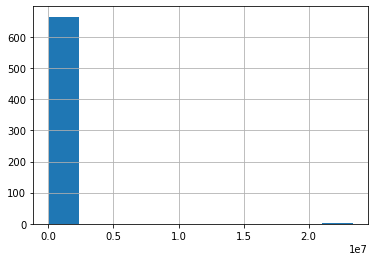

In [395]:
Q1_y_train.hist()

In [297]:
Q1_y_train.value_counts()/len(Q1_y_train.value_counts())

90000.00       14.285714
130000.00       0.190476
120000.00       0.095238
110000.00       0.095238
72500.00        0.071429
57499.50        0.047619
140000.00       0.047619
139999.50       0.047619
99999.50        0.047619
64999.50        0.047619
221000.00       0.047619
75000.00        0.047619
113620.00       0.047619
133700.00       0.047619
94942.50        0.047619
85000.00        0.023810
192660.00       0.023810
115045.00       0.023810
124551.50       0.023810
108670.12       0.023810
217360.00       0.023810
100000.00       0.023810
125000.00       0.023810
114999.50       0.023810
79040.00        0.023810
76146.50        0.023810
115000.00       0.023810
159068.00       0.023810
144248.00       0.023810
132600.00       0.023810
165000.00       0.023810
12000.00        0.023810
218400.00       0.023810
208000.00       0.023810
82842.00        0.023810
23400000.00     0.023810
261300.00       0.023810
104999.50       0.023810
124900.00       0.023810
219440.00       0.023810


In [298]:

# Q1_lr = LogisticRegression(max_iter=10000)
# Q1_lr.fit(Q1_X_train, Q1_y_train)
# Q1_lr.score(Q1_X_test, Q1_y_test)

# No LogisticRegression for when the target is a continous

In [299]:
# Apply LinearRegression() into the Salary for Question 1

Q1_lr_OLS = linear_model.LinearRegression()
Q1_lr_OLS.fit(Q1_X_train, Q1_y_train)

LinearRegression()

In [396]:
# Take a raw look at the data

Q1_y_hat = Q1_lr_OLS.predict(Q1_X_test)
display(Q1_y_test,Q1_y_hat)

423      90000.0
548      90000.0
730      90000.0
588      90000.0
830      72500.0
          ...   
684      90000.0
1042     90000.0
784      90000.0
533     120000.0
700      90000.0
Name: renumeration03, Length: 413, dtype: float64

array([ 9.01940000e+04,  2.53253330e+15,  1.47971185e+15,  6.01818814e+13,
        7.25820000e+04,  2.24619248e+14,  9.27805042e+14, -1.96836958e+15,
       -2.93582358e+15,  5.52768461e+15,  1.94887024e+15,  8.99592500e+04,
        8.98692500e+04, -1.01281951e+15,  9.03633750e+04,  9.71205181e+14,
        2.73211176e+15,  8.95110000e+04, -1.95039429e+15,  8.98682500e+04,
        9.02652500e+04,  8.98860000e+04, -2.62663527e+14,  9.00830000e+04,
       -8.78412295e+14,  1.14724339e+14,  1.15062750e+05, -1.33361737e+15,
        8.99727500e+04, -2.68386079e+15,  1.91375695e+14,  4.38215354e+14,
        1.22381459e+15,  9.61464943e+14, -9.28766407e+14, -2.51262994e+15,
        9.01440000e+04,  8.99460000e+04, -6.19595216e+14,  3.99926385e+15,
       -3.23177437e+15, -1.12618309e+15,  5.96731845e+15,  8.05441539e+14,
        8.99985000e+04,  8.77070000e+04,  8.92833750e+04, -1.51330155e+15,
        9.01867500e+04,  2.49436445e+15,  9.04332500e+04, -4.24154884e+14,
       -5.38651776e+14,  

In [397]:
# Show jointplot to visualise predictions

# sns.jointplot(Q1_y_test,Q1_y_hat)


```python
# Saved as an image instead due to the error the first time
```

MemoryError: Unable to allocate 439. TiB for an array with shape (60367741547357,) and data type float64


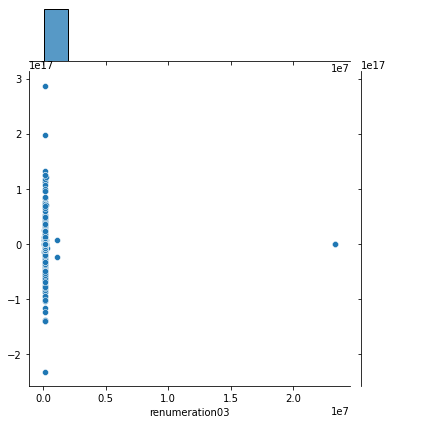

In [303]:
# Q1_lr_OLS.summary()
# AttributeError: 'LinearRegression' object has no attribute 'summary'

In [304]:
# Trying to get the r2_score

# Q1_lr_OLS.fit(Q1_X_train, Q1_y_train).r2_score
# AttributeError: 'LinearRegression' object has no attribute 'r2_score'

print("Checking the r2_score:\n")

display(
    r2_score(Q1_y_test,Q1_y_hat),
    r2_score(Q1_y_hat, Q1_y_test)
    )

print("\nNegative r2_score means my prediction tends to be less accurate than the average value of the data")

Checking the r2_score:



-4.751951879653605e+20

-0.0006131683138279609


Negative r2_score means my prediction tends to be less accurate than the average value of the data


In [305]:
# train_test_split for Q1b, this time preparing for Logistic Regression

Q1b_X_train, Q1b_X_test, Q1b_y_train, Q1b_y_test = train_test_split(Q1_X, Q1b_y, test_size=phi_2, random_state=42)



display(
    Q1b_X_train, 
    Q1b_X_test, 
    Q1b_y_train, 
    Q1b_y_test,
    type(Q1b_y_train),
    Q1b_y_train.value_counts(), 
    Q1b_y_test.value_counts(),
    type(Q1b_y_test)
    )


,00,000,0000,0000applications,000kg,000mw,000talent,001,0018,0032,...,zapier,zealand,zealandinfrastructure,zero,zinfra,zing,zondag,zone,zones,zoo
1027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


,00,000,0000,0000applications,000kg,000mw,000talent,001,0018,0032,...,zapier,zealand,zealandinfrastructure,zero,zinfra,zing,zondag,zone,zones,zoo
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1027       At_Average
668        At_Average
807        At_Average
762        At_Average
163        At_Average
            ...      
330        At_Average
466     Above_Average
121        At_Average
1044       At_Average
860        At_Average
Name: renumeration03_hi_lo, Length: 666, dtype: object

423        At_Average
548        At_Average
730        At_Average
588        At_Average
830     Below_Average
            ...      
684        At_Average
1042       At_Average
784        At_Average
533     Above_Average
700        At_Average
Name: renumeration03_hi_lo, Length: 413, dtype: object

pandas.core.series.Series

At_Average       600
Above_Average     52
Below_Average     14
Name: renumeration03_hi_lo, dtype: int64

At_Average       359
Above_Average     41
Below_Average     13
Name: renumeration03_hi_lo, dtype: int64

pandas.core.series.Series

In [306]:
#Check the baseline accuracies

Q1b_y_train.value_counts()/len(Q1b_y_train)


At_Average       0.900901
Above_Average    0.078078
Below_Average    0.021021
Name: renumeration03_hi_lo, dtype: float64

In [307]:
# Save the baseline accuracy for Q1b with the classification approach

Q1b_baseline_accuracy = max(Q1b_y_train.value_counts()/len(Q1b_y_train))
Q1b_baseline_accuracy

0.9009009009009009

In [308]:
# Can't use Log Reg when target is continuous

# display("Q1_lr.score(X_test, y_test) = ", Q1_lr.score(X_test, y_test),
#         "Q1_baseline_accuracy = ", Q1_baseline_accuracy
#        )

# print("\nLogisticRegression() doesn't exceed the baseline accuracy, many values have been replaced with the average salary")

In [309]:
Q1b_y_train

1027       At_Average
668        At_Average
807        At_Average
762        At_Average
163        At_Average
            ...      
330        At_Average
466     Above_Average
121        At_Average
1044       At_Average
860        At_Average
Name: renumeration03_hi_lo, Length: 666, dtype: object

In [310]:
display(Q1_X_train, Q1b_y_train)

,00,000,0000,0000applications,000kg,000mw,000talent,001,0018,0032,...,zapier,zealand,zealandinfrastructure,zero,zinfra,zing,zondag,zone,zones,zoo
1027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


1027       At_Average
668        At_Average
807        At_Average
762        At_Average
163        At_Average
            ...      
330        At_Average
466     Above_Average
121        At_Average
1044       At_Average
860        At_Average
Name: renumeration03_hi_lo, Length: 666, dtype: object

In [311]:
Q1b_lr = LogisticRegression(max_iter=10000)
Q1b_lr.fit(Q1_X_train, Q1b_y_train)

# ValueError: Found input variables with inconsistent numbers of samples: [666, 2026]

LogisticRegression(max_iter=10000)

In [312]:

display(
    Q1b_lr.score(Q1b_X_test, Q1b_y_test),
    Q1b_baseline_accuracy
    )

0.8934624697336562

0.9009009009009009

The model `LogisticRegression(max_iter=10000)` in unable to exceed the baseline accuracy

In [313]:
# Apply the svm.SVC to Q1b with the classification approach


Q1_clf_raw = svm.SVC(kernel='linear') # Just linear, no Gamma and no C mentioned
Q1_clf_raw.fit(Q1_X_train,Q1b_y_train)




SVC(kernel='linear')

In [402]:
cross_val_score(Q1_clf_raw, Q1_X_test, Q1b_y_test, cv=5, scoring='accuracy').mean()

# Comparing is using 'Q1_X_test' or 'Q1b_X_test' makes a different - it shoudln't

0.8863355862474288

In [403]:
Q1b_svmSVC_score = cross_val_score(Q1_clf_raw, Q1b_X_test, Q1b_y_test, cv=5, scoring='accuracy').mean()
Q1b_svmSVC_score

0.8863355862474288

In [315]:
#Chechk scores for all Q1b models and compare to the baseline accuracy
#

display(
    Q1b_lr.score(Q1b_X_test, Q1b_y_test),
    Q1b_svmSVC_score,
    Q1b_baseline_accuracy,
    Q1b_y_train.unique()
    )

0.8934624697336562

0.8863355862474288

0.9009009009009009

array(['At_Average', 'Above_Average', 'Below_Average'], dtype=object)

In [316]:
# Cross-validate a KNN classifier and a BaggingClassifier with a KNN base estimator.

# dsi-unit-4.03-ensemble-intro_to_ensembles_bagging-lesson

Q1b_knn = KNeighborsClassifier()
Q1b_bagging = BaggingClassifier(base_estimator = Q1b_knn, max_samples=0.5, max_features=0.5)


In [317]:
Q1_X

,00,000,0000,0000applications,000kg,000mw,000talent,001,0018,0032,...,zapier,zealand,zealandinfrastructure,zero,zinfra,zing,zondag,zone,zones,zoo
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [318]:
# Q1b_y

In [319]:
# print(("KNN Score:\t", cross_val_score(Q1b_knn, X, y, cv=5, n_jobs=-1).mean())) # still on 'y'
# print(("Bagging Score:\t", cross_val_score(Q1b_bagging, X, y, cv=5, n_jobs=-1).mean())) # still on 'y'

print(("KNN Score:\t", cross_val_score(Q1b_knn, Q1_X, Q1b_y, cv=5, n_jobs=-1).mean()))
print(("Bagging Score:\t", cross_val_score(Q1b_bagging, Q1_X, Q1b_y, cv=5, n_jobs=-1).mean()))
print("Q1b_baseline_accuracy = ", Q1b_baseline_accuracy)
print("Q1b_y_train.unique() = ", Q1b_y_train.unique())
    

('KNN Score:\t', 0.8804392764857882)
('Bagging Score:\t', 0.8897157622739019)
Q1b_baseline_accuracy =  0.9009009009009009
Q1b_y_train.unique() =  ['At_Average' 'Above_Average' 'Below_Average']


In [320]:
# ValueError: Unknown label type: 'continuous'


# display(
#     Q1b_lr.score(Q1_X_test, Q1b_y_test),
#     Q1b_svmSVC_score,
#     Q1_baseline_accuracy
#     )

# ValueError: Unknown label type: 'continuous'

In [321]:
data['Job Title']

0                             Data Scientist
1                               Data Analyst
2       Junior Business Intelligence Analyst
3                               Data Analyst
4                               Data Analyst
                        ...                 
1074                            Data Analyst
1075    Senior Data Analyst - NSW Government
1076    Principal Engineer (Knowledge Graph)
1077                 Data Management Analyst
1078                           Sales Analyst
Name: Job Title, Length: 1079, dtype: object

In [325]:
def jobtitle_sort(df):
    if df['business'] + df['intelligence'] == 2:
        return 'business intelligence'
    elif df['analyst'] + df['analysts'] + df['analytical'] + df['analytics'] >= 1:
        return 'data analyst'
    elif df['science'] + df['scientist'] >= 1:
        return 'data scientist'

In [326]:
# Show in cell near my function-writing

data['Job Title']

0                             Data Scientist
1                               Data Analyst
2       Junior Business Intelligence Analyst
3                               Data Analyst
4                               Data Analyst
                        ...                 
1074                            Data Analyst
1075    Senior Data Analyst - NSW Government
1076    Principal Engineer (Knowledge Graph)
1077                 Data Management Analyst
1078                           Sales Analyst
Name: Job Title, Length: 1079, dtype: object

In [327]:
def jobtitle_sort02(series):
    series = str(series).lower()
    
    if any(x in series for x in ['business','intelligence']):
            return 'business intelligence'
    elif any(x in series for x in ['analyst','analysts','analytical','analytics']):
            return 'data analyst'
    elif any(x in series for x in ['science','scientist']):
            return 'data scientist'
        
    
#     if df['business'] + df['intelligence'] == 2:
#         return 'business intelligence'
#     elif df['analyst'] + df['analysts'] + df['analytical'] + df['analytics'] >= 1:
#         return 'data analyst'
#     elif df['science'] + df['scientist'] >= 1:
#         return 'data scientist'

In [328]:
# data['Job Title02'] = data.Job_Title.map(jobtitle_sort02)

data['Job Title02'] = data['Job Title'].map(jobtitle_sort02)

data['Job Title02']

# Next step dsi-unit-4.19-nlp-intro_to_nlp-lab

<ipython-input-328-cfa6d8035932>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0              data scientist
1                data analyst
2       business intelligence
3                data analyst
4                data analyst
                ...          
1074             data analyst
1075             data analyst
1076                     None
1077             data analyst
1078             data analyst
Name: Job Title02, Length: 1079, dtype: object

In [332]:
# Having a look

# dsi-unit-4.19-nlp-intro_to_nlp-lab

data[['Description','Job Title02']]

,Description,Job Title02
0,We are scaling up! An exciting opportunity exi...,data scientist
1,The focus of this role is to provide support t...,data analyst
2,"Your new companyAt Hays, we are on a journey t...",business intelligence
3,About Atos:Atos is a global leader in digital ...,data analyst
4,About Infrastructure Partnerships AustraliaInf...,data analyst
...,...,...
1074,We are looking to engage a skilled and enthusi...,data analyst
1075,Senior Data Analyst - NSW GovernmentLocation: ...,data analyst
1076,Company DescriptionAbout SEEKSEEK’s portfolio ...,None
1077,About the role:In this role you will be requir...,data analyst


In [332]:
# Having a look

# dsi-unit-4.19-nlp-intro_to_nlp-lab

data[['Description','Job Title02']]

,Description,Job Title02
0,We are scaling up! An exciting opportunity exi...,data scientist
1,The focus of this role is to provide support t...,data analyst
2,"Your new companyAt Hays, we are on a journey t...",business intelligence
3,About Atos:Atos is a global leader in digital ...,data analyst
4,About Infrastructure Partnerships AustraliaInf...,data analyst
...,...,...
1074,We are looking to engage a skilled and enthusi...,data analyst
1075,Senior Data Analyst - NSW GovernmentLocation: ...,data analyst
1076,Company DescriptionAbout SEEKSEEK’s portfolio ...,None
1077,About the role:In this role you will be requir...,data analyst


In [333]:
# Calculating baseline accuracy

data['Job Title02'].value_counts()

data analyst             559
business intelligence    327
data scientist            24
Name: Job Title02, dtype: int64

In [334]:
# Calculating baseline accuracy

data['Job Title02'].value_counts()/len(data['Job Title02'])

data analyst             0.518072
business intelligence    0.303058
data scientist           0.022243
Name: Job Title02, dtype: float64

In [335]:
# Calculating baseline accuracy

Q2_baseline_accuracy = max(data['Job Title02'].value_counts()/len(data['Job Title02']))
Q2_baseline_accuracy

0.5180722891566265

In [336]:
display(
    data['Job Title02'].unique(),
    list(data['Job Title02'].unique())
    )

array(['data scientist', 'data analyst', 'business intelligence', None],
      dtype=object)

['data scientist', 'data analyst', 'business intelligence', None]

In [337]:
list(data['Job Title02'].unique()).index('business intelligence')

2

In [338]:
data['Job Title02_num'] = [list(data['Job Title02'].unique()).index(x) for x in data['Job Title02'].to_list()]
# data[['Job Title02_num, Job Title02']]

Q2_y = data['Job Title02_num']
y_words = data['Job Title02']

data[['Job Title02','Job Title02_num']]

<ipython-input-338-e6906182478c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Job Title02,Job Title02_num
0,data scientist,0
1,data analyst,1
2,business intelligence,2
3,data analyst,1
4,data analyst,1
...,...,...
1074,data analyst,1
1075,data analyst,1
1076,None,3
1077,data analyst,1


In [339]:
# data['Job Title02_num'] = list(data['Job Title02'].unique()).index(data['Job Title02'])
# data['Job Title02_num']
# # ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [340]:
Q2_y

0       0
1       1
2       2
3       1
4       1
       ..
1074    1
1075    1
1076    3
1077    1
1078    1
Name: Job Title02_num, Length: 1079, dtype: int64

In [341]:
Q2_df = cvec_df(data['Description']) # Use funtions to create DataFrame
# X = Q2_df


Q2_df['Job Title02_num'] = data['Job Title02_num'] # Add the target-column
Q2_df


Q2_X_train, Q2_X_test, Q2_y_train, Q2_y_test = train_test_split(Q2_df, Q2_y, test_size=phi_2, random_state=42)



display(
    Q2_X_train, 
    Q2_X_test, 
    Q2_y_train, 
    Q2_y_test,
    Q2_y_train.value_counts(), 
    Q2_y_test.value_counts()
    )


,00,000,0000,0000applications,000kg,000mw,000talent,001,0018,0032,...,zealand,zealandinfrastructure,zero,zinfra,zing,zondag,zone,zones,zoo,Job Title02_num
1027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1044,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


,00,000,0000,0000applications,000kg,000mw,000talent,001,0018,0032,...,zealand,zealandinfrastructure,zero,zinfra,zing,zondag,zone,zones,zoo,Job Title02_num
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


1027    3
668     2
807     1
762     1
163     3
       ..
330     1
466     3
121     0
1044    1
860     3
Name: Job Title02_num, Length: 666, dtype: int64

423     1
548     2
730     2
588     2
830     2
       ..
684     1
1042    2
784     2
533     1
700     1
Name: Job Title02_num, Length: 413, dtype: int64

1    341
2    200
3    114
0     11
Name: Job Title02_num, dtype: int64

1    218
2    127
3     55
0     13
Name: Job Title02_num, dtype: int64

In [343]:
# Most common words accross all job titles 

cvec_df(data['Description']).sum(axis=0).sort_values(ascending = False).head(60)

data             7516
business         4425
experience       3418
work             2650
team             2418
role             2413
skills           1967
working          1964
reporting        1838
support          1624
people           1490
analysis         1375
development      1336
management       1265
ability          1246
analyst          1244
requirements     1138
bi               1138
analytics        1104
strong           1069
insights         1068
including        1066
apply            1055
information      1051
key              1029
solutions        1013
new               996
stakeholders      978
services          949
provide           906
australia         882
opportunity       880
customer          878
using             866
environment       828
reports           814
sql               809
systems           797
power             791
develop           762
technical         757
knowledge         704
opportunities     695
tools             694
project           676
high      

In [344]:
Q2_y_train.unique()

array([3, 2, 1, 0], dtype=int64)

In [345]:
data['Job Title02'].unique()

array(['data scientist', 'data analyst', 'business intelligence', None],
      dtype=object)

In [346]:
Q2_lr = LogisticRegression()
Q2_lr.fit(Q2_X_train, Q2_y_train)

# y = data['Job Title02_num']

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [347]:
display(
    Q2_lr.score(Q2_X_test, Q2_y_test),
    Q2_baseline_accuracy
    )

0.8619854721549637

0.5180722891566265

When predicting the job description using the Description, LogisticRegression() significantly excees the baseline accuracy.

In [348]:
print("Q2_lr.score(Q2_X_test, Q2_y_test) = ",Q2_lr.score(Q2_X_test, Q2_y_test))
print("Q2_baseline_accuracy = ",Q2_baseline_accuracy)

Q2_lr.score(Q2_X_test, Q2_y_test) =  0.8619854721549637
Q2_baseline_accuracy =  0.5180722891566265


In [349]:
# Cross-validate a KNN classifier and a BaggingClassifier with a KNN base estimator

# dsi-unit-4.03-ensemble-intro_to_ensembles_bagging-lesson

In [350]:
Q2_knn = KNeighborsClassifier()
Q2_bagging = BaggingClassifier(base_estimator = Q2_knn, max_samples=0.5, max_features=0.5)

In [351]:
print(("KNN Score:\t", cross_val_score(Q2_knn, Q2_df, Q2_y, cv=5, n_jobs=-1).mean()))
print(("Bagging Score:\t", cross_val_score(Q2_bagging, Q2_df, Q2_y, cv=5, n_jobs=-1).mean()))



('KNN Score:\t', 0.6626012058570196)
('Bagging Score:\t', 0.6625710594315246)


In [352]:
Q2_lr.predict(Q2_X_test)

array([1, 3, 2, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 3, 2, 3, 1, 1, 2, 2, 3, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 3, 2, 2, 2, 3, 1, 1, 1, 2, 1, 2, 3,
       1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 3, 1, 1, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       3, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2,
       1, 2, 3, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 1, 2, 2, 2, 1, 2, 3, 1, 1, 1,
       2, 2, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1, 1, 2, 3, 0, 2, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2,
       2, 1, 1, 2, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 2, 1, 2, 1, 2, 3, 3, 1,
       3, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2,

In [353]:
# Reading out the predictions for the job titles

X_test_view = Q2_X_test[['Job Title02_num']]
X_test_view['prediction_num'] = Q2_lr.predict(Q2_X_test)
X_test_view['prediction'] = [list(data['Job Title02'].unique())[x] for x in list(X_test_view['prediction_num'])]
X_test_view['Job Title02'] = [list(data['Job Title02'].unique())[x] for x in list(X_test_view['Job Title02_num'])]

X_test_view[['prediction','Job Title02']]

<ipython-input-353-ce22dde8c73c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-353-ce22dde8c73c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-353-ce22dde8c73c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,prediction,Job Title02
423,data analyst,data analyst
548,None,business intelligence
730,business intelligence,business intelligence
588,data analyst,business intelligence
830,business intelligence,business intelligence
...,...,...
684,data analyst,data analyst
1042,business intelligence,business intelligence
784,business intelligence,business intelligence
533,data analyst,data analyst


In [354]:
list(data['Job Title02'].unique())

['data scientist', 'data analyst', 'business intelligence', None]

In [355]:
[list(data['Job Title02'].unique())[x] for x in list(X_test_view['prediction_num'])]

['data analyst',
 None,
 'business intelligence',
 'data analyst',
 'business intelligence',
 'business intelligence',
 'data analyst',
 'data analyst',
 None,
 'data analyst',
 'business intelligence',
 'data analyst',
 'data analyst',
 None,
 'business intelligence',
 None,
 'data analyst',
 'data analyst',
 'business intelligence',
 'business intelligence',
 None,
 'data analyst',
 'business intelligence',
 'data analyst',
 'data analyst',
 'data analyst',
 'business intelligence',
 'data analyst',
 'data analyst',
 'business intelligence',
 'business intelligence',
 'data analyst',
 'data analyst',
 'data analyst',
 'data analyst',
 'data analyst',
 'business intelligence',
 'data analyst',
 'data analyst',
 'data analyst',
 'business intelligence',
 'data analyst',
 'data analyst',
 'business intelligence',
 'data analyst',
 'data analyst',
 'data analyst',
 'data analyst',
 'business intelligence',
 'data analyst',
 'business intelligence',
 None,
 'business intelligence',
 'data

In [356]:
# Try linear_model.LogisticRegression from 
# dsi-unit-3.40-svm-support_vector_machines-lesson



In [357]:
# target columns
# y

display(
    list(data['Job Title02'].unique()),
    len(list(data['Job Title02'].unique()))
    )

['data scientist', 'data analyst', 'business intelligence', None]

4

In [358]:
# dsi-unit-4.19-nlp-intro_to_nlp-lab

# Keep the original

# common_words = []
# for i in range(4):
#     word_count = X_train[y_train==i].sum(axis=0)
#     print(names[i], "most common words")
#     cw = word_count.sort_values(ascending = False).head(20)
#     print(cw)
#     common_words.extend(cw.index)
#     print()

In [359]:
# The uniques in target column

list(data['Job Title02'].unique())

['data scientist', 'data analyst', 'business intelligence', None]

In [360]:
# Count of uniques in target column

len(list(data['Job Title02'].unique()))

4

In [361]:
# dsi-unit-4.19-nlp-intro_to_nlp-lab

# X_train = 
# y_train = 
names = list(data['Job Title02'].unique())

common_words = []
for i in range(len(list(data['Job Title02'].unique()))):
    word_count = Q2_X_train[Q2_y_train==i].sum(axis=0)
    print(names[i], "Most Common Words")
    cw = word_count.sort_values(ascending = False).head(20)
    print(cw)
    common_words.extend(cw.index)
    print()

data scientist Most Common Words
data           121
business        66
experience      64
science         40
team            38
work            36
learning        33
statistical     27
machine         27
working         23
role            22
analytics       21
models          21
techniques      20
using           20
skills          18
tools           18
ability         18
people          17
building        17
dtype: int64

data analyst Most Common Words
data               2399
business           1017
experience         1011
work                858
role                781
team                756
reporting           699
skills              653
working             583
people              523
support             505
analysis            475
insights            430
analyst             427
ability             394
analytics           392
development         391
management          362
strong              360
Job Title02_num     341
dtype: int64

business intelligence Most Common Words
business

I will add the lists above into the presentation slides as an insight


Q2: "What components of a job posting distinguish data scientists from other data jobs?"


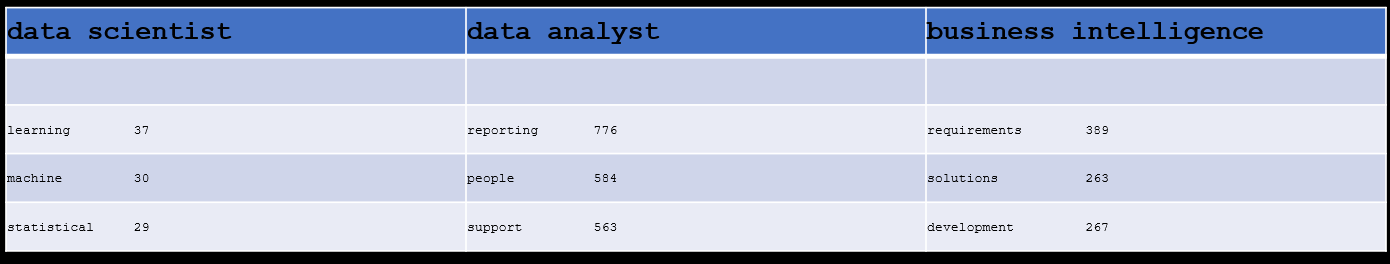

Most commonly recurring words for a data scientists that are not so common in the the other two job titles:

- learning
- machine
- statistical



In [362]:
# Try make a work-list again but regarding Salary Levels

In [363]:
data['renumeration03_hi_lo'].unique()

array(['Above_Average', 'At_Average', 'Below_Average'], dtype=object)

In [364]:
Q1_X

,00,000,0000,0000applications,000kg,000mw,000talent,001,0018,0032,...,zapier,zealand,zealandinfrastructure,zero,zinfra,zing,zondag,zone,zones,zoo
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [365]:
np.array(Q1b_y)

array(['Above_Average', 'At_Average', 'At_Average', ..., 'At_Average',
       'At_Average', 'At_Average'], dtype=object)

In [366]:
# dsi-unit-4.19-nlp-intro_to_nlp-lab

# data['renumeration03_hi_lo']

# Need to fix_

# X_train = 
# y_train = 
names = list(data['renumeration03_hi_lo'].unique())

common_words = []
for i in range(len(list(data['renumeration03_hi_lo'].unique()))):
    word_count = Q1_X[np.array(Q1b_y)==i].sum(axis=0)
    print(names[i], "Most Common Words")
    cw = word_count.sort_values(ascending = False).head(60)
    print(cw)
    common_words.extend(cw.index)
    print()

Above_Average Most Common Words
00                      0.0
plan                    0.0
pivots                  0.0
pixelsadditional        0.0
pixelssetup             0.0
pl                      0.0
place                   0.0
placed                  0.0
placement               0.0
placements              0.0
places                  0.0
plain                   0.0
plamio                  0.0
planaccess              0.0
pivotal                 0.0
planet                  0.0
planflexible            0.0
planlocation            0.0
planned                 0.0
planner                 0.0
planners                0.0
planning                0.0
planningfree            0.0
planningstrong          0.0
planogram               0.0
planpaid                0.0
pivoted                 0.0
pivot                   0.0
pmi                     0.0
pioneer                 0.0
piece                   0.0
pieces                  0.0
pierucci                0.0
pii                     0.0
pillar          

In [367]:
# Second model: SVM (support_vector_machines)

# dsi-unit-3.40-svm-support_vector_machines-lesson

In [368]:
# # Compare three SVMs with different kernels on the iris data visually

# # dsi-unit-3.40-svm-support_vector_machines-lesson

# C = 1.0  # SVM regularization parameter
# rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)  # default kernel
# svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

# # create a mesh to plot in
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
#                      np.arange(y_min, y_max, .02))

# # title for the plots
# titles = ['SVC with linear kernel',
#           'SVC with RBF kernel',
#           'SVC with polynomial (degree 3) kernel']

# for i, clf in enumerate((svc, rbf_svc, poly_svc)):
#     plt.subplot(2, 2, i + 1)
#     plt.subplots_adjust(wspace=0.4, hspace=0.4)
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
#     # Plot also the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
#     plt.xlabel('Sepal length')
#     plt.ylabel('Sepal width')
#     plt.xticks(())
#     plt.yticks(())
#     plt.title(titles[i])
# plt.show()

# # TypeError: '(slice(None, None, None), 0)' is an invalid key

In [369]:
# Cross-validate a default logistic regression and default SVM on the iris data

# # dsi-unit-3.40-svm-support_vector_machines-lesson

In [370]:
# Cross-validate a SVM on the data

# dsi-unit-3.40-svm-support_vector_machines-lesson

clf_raw = svm.SVC(kernel='linear') # Just linear, no Gamma and no C mentioned
clf_raw.fit(Q2_X_train,Q2_y_train)


SVC(kernel='linear')

In [371]:
Q2_svmSVC_score = cross_val_score(clf_raw, Q2_X_test, Q2_y_test, cv=5, scoring='accuracy').mean()

In [372]:
# Compare the three different scores

display(
    Q2_lr.score(Q2_X_test, Q2_y_test),
    Q2_svmSVC_score,
    Q2_baseline_accuracy
    )



0.8619854721549637

0.7772847487511019

0.5180722891566265

This is my second answer for Question 2

Support Vector Machine coupled with Cross Validation even further exceeds the baseline accuracy but doesn't exceed the accuracy for logistic regression


In [373]:
# # Gridsearch the optimal C, gamma, and kernel

# # Warning SUPER MEGAAA SLOWWWWW

# # dsi-unit-3.40-svm-support_vector_machines-lesson


# clf_raw_grid = svm.SVC()

# gamma_range = np.logspace(-5, 2, 10)
# C_range = np.logspace(-3, 2, 10)
# kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']

# param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

# grid = GridSearchCV(clf_raw_grid, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
# grid.fit(X, y)

# # Fits 3 folds for each of 400 candidates, totalling 1200 fits


# # dsi-unit-3.40-svm-support_vector_machines-lesson

# print(grid.best_params_)
# print(grid.best_score_)

# best_svm = grid.best_estimator_

# print("grid.best_estimator_ = ",grid.best_estimator_)

# clf_best = svm.SVC(best_svm)

# print(cross_val_score(clf_best, X, y, cv=5, scoring='accuracy').mean())

In [374]:
# Use StandardScaler() before using PCA

# dsi-unit-4.08-pca-intro-lesson

X_s = StandardScaler().fit_transform(Q1_X)
X_s

array([[-0.07477833,  2.04442665, -0.03045725, ..., -0.03045725,
        -0.0528025 , -0.03045725],
       [-0.07477833, -0.38234602, -0.03045725, ..., -0.03045725,
        -0.0528025 , -0.03045725],
       [-0.07477833, -0.38234602, -0.03045725, ..., -0.03045725,
        -0.0528025 , -0.03045725],
       ...,
       [-0.07477833, -0.38234602, -0.03045725, ..., -0.03045725,
        -0.0528025 , -0.03045725],
       [-0.07477833, -0.38234602, -0.03045725, ..., -0.03045725,
        -0.0528025 , -0.03045725],
       [-0.07477833, -0.38234602, -0.03045725, ..., -0.03045725,
        -0.0528025 , -0.03045725]])

In [375]:
# dsi-unit-4.08-pca-intro-lesson

pca_3d = PCA(n_components=3)
X_s_fitted = pca_3d.fit(X_s)

X_s_fitted

PCA(n_components=3)

In [376]:
# dsi-unit-4.08-pca-intro-lesson


display(
    X_s_fitted.transform(X_s),
    X_s_fitted.transform(X_s).shape
    )

X_r = X_s_fitted.transform(X_s)

array([[ 3.56203099e+00, -2.61137451e+00,  4.68059196e+00],
       [ 4.26367045e-02, -1.03044784e-01,  4.10195959e-01],
       [-1.36248888e+00, -1.09761343e+00, -5.59808235e-01],
       ...,
       [ 1.77793568e+02, -1.93050654e+01, -1.19520838e+01],
       [-3.27954256e+00, -1.87440871e+00, -1.80183353e+00],
       [-3.43024277e+00, -1.41810803e+00, -1.54638135e+00]])

(1079, 3)

In [377]:
display(
    pca_3d.components_,
    pca_3d.components_.shape
    )

array([[-0.00132672,  0.0030748 , -0.00036602, ..., -0.00051812,
         0.00011931,  0.00040214],
       [-0.000717  ,  0.00248233,  0.00022626, ..., -0.00061767,
        -0.00059214, -0.00057   ],
       [-0.00160229,  0.00604908, -0.00160229, ..., -0.00042384,
        -0.00038573, -0.00017599]])

(3, 14135)

In [378]:
# dsi-unit-4.08-pca-intro-lesson

np.cumsum(pca_3d.explained_variance_ratio_)

array([0.0070467 , 0.01273103, 0.01785062])

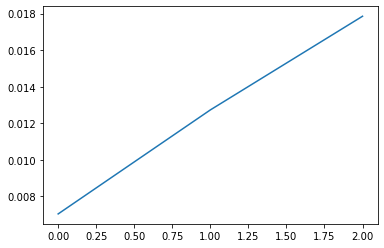

In [379]:
plt.plot(np.cumsum(pca_3d.explained_variance_ratio_))

In [380]:
y_words.unique()

array(['data scientist', 'data analyst', 'business intelligence', None],
      dtype=object)

In [381]:
# Hashed out for speed
# Saved output image for speed

# # dsi-unit-4.08-pca-intro-lesson




# target_names = y_words.unique()

# plt.figure(figsize=(12,8))
# pca = PCA(n_components=2)
# pca.fit(X_s)

# xvector = pca.components_[0] 
# yvector = pca.components_[1]

# xs = pca.transform(X_s)[:,0] 
# ys = pca.transform(X_s)[:,1]

# # for i in range(1):

# for i in range(len(xvector)):
#     plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
#               color='r', width=0.0005, head_width=0.0025)
#     plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
#              list(X.columns)[i], color='r')

# for target_name in target_names:
#     plt.scatter(X_r[y == target_name, 0], X_r[y == target_name, 1], alpha=.8, lw=1,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('PCA of Job Titles')
# plt.show()


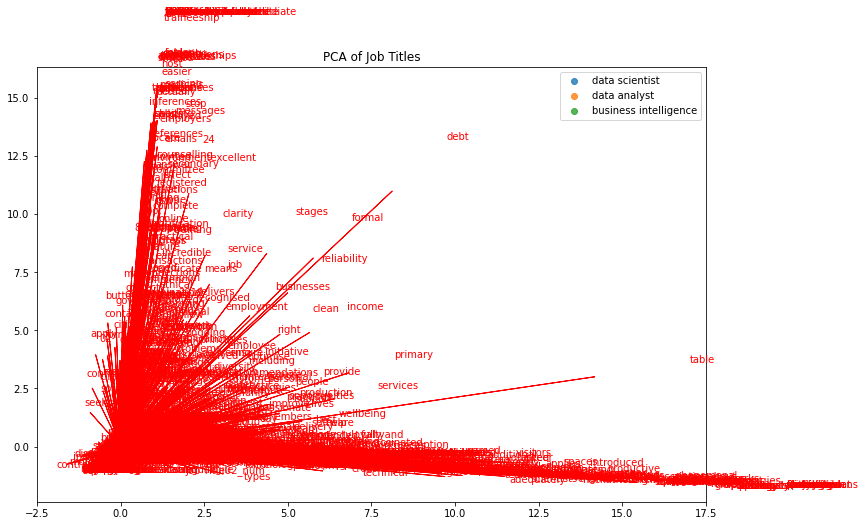

In [382]:
import plotly.express as px

pca = PCA(n_components=3)

X_r = pca.fit(X_s).transform(X_s)

X_plus_y = pd.DataFrame(data=X_r, columns=['PC1','PC2','PC3' ])

X_plus_y['Job Title02'] = data['Job Title02']




In [383]:
X_plus_y

,PC1,PC2,PC3,Job Title02
0,3.258128,0.454867,7.532926,data scientist
1,-0.107526,-0.691235,-0.459603,data analyst
2,-1.359367,-1.051953,-0.522216,business intelligence
3,6.456807,1.635333,8.213958,data analyst
4,-0.958824,-2.012808,-0.419099,data analyst
...,...,...,...,...
1074,-3.804988,-1.856444,-2.289306,data analyst
1075,-1.726075,-0.722585,-1.648289,data analyst
1076,177.859469,-18.421541,-13.864139,None
1077,-3.261555,-1.731547,-1.896029,data analyst


In [384]:
X_plus_y.isnull().sum()

PC1              0
PC2              0
PC3              0
Job Title02    169
dtype: int64

In [385]:
X_plus_y['Job Title02'].isnull().sum()

169

In [386]:
print(X_plus_y['Job Title02'].isnull().sum())

X_plus_y['Job Title02'].fillna("Unknown", inplace = True)

display(
    X_plus_y,
    X_plus_y['Job Title02'].isnull().sum()
    )

169


,PC1,PC2,PC3,Job Title02
0,3.258128,0.454867,7.532926,data scientist
1,-0.107526,-0.691235,-0.459603,data analyst
2,-1.359367,-1.051953,-0.522216,business intelligence
3,6.456807,1.635333,8.213958,data analyst
4,-0.958824,-2.012808,-0.419099,data analyst
...,...,...,...,...
1074,-3.804988,-1.856444,-2.289306,data analyst
1075,-1.726075,-0.722585,-1.648289,data analyst
1076,177.859469,-18.421541,-13.864139,Unknown
1077,-3.261555,-1.731547,-1.896029,data analyst


0

In [387]:
# data['renumeration03']

In [388]:
X_plus_y['renumeration03'] = data['renumeration03']
# X_plus_y

In [389]:
# Plot the 3d PCA with 'renumeration'


fig = px.scatter_3d(X_plus_y, 
                    x = X_plus_y.PC1, 
                    y = X_plus_y.PC2, 
                    z = X_plus_y.PC3, 
                    color = 'Job Title02')
fig.show()

# KeyError: (nan, '', '')

In [390]:
# Plot the 3d PCA with 'renumeration'


fig = px.scatter_3d(X_plus_y, 
                    x = X_plus_y.PC1, 
                    y = X_plus_y.PC2, 
                    z = X_plus_y.PC3, 
                    color = 'renumeration03')
fig.show()

# KeyError: (nan, '', '')
# ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['PC1', 'PC2', 'PC3', 'Job Title02'] but received: renumeration03
